<a href="https://colab.research.google.com/github/odhiambk/CIS-678-Machine-Learning/blob/main/CIS_678_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the training RNA, training ADT, and test RNA data to inspect them.

In [1]:
import pandas as pd

# Define paths for each dataset
path_train_rna = "https://raw.githubusercontent.com/odhiambk/CIS-678-Machine-Learning/main/training_set_rna.csv"
path_train_adt = "https://raw.githubusercontent.com/odhiambk/CIS-678-Machine-Learning/main/training_set_adt.csv"
path_test_rna = "https://raw.githubusercontent.com/odhiambk/CIS-678-Machine-Learning/main/test_set_rna.csv"

# Load training RNA data, ADT data, and test RNA data
training_rna_df = pd.read_csv(path_train_rna, index_col=0)
training_adt_df = pd.read_csv(path_train_adt, index_col=0)
test_rna_df = pd.read_csv(path_test_rna, index_col=0)

# Inspect the basic information of each dataset
print("Training RNA data shape:", training_rna_df.shape)
print("Training ADT data shape:", training_adt_df.shape)
print("Test RNA data shape:", test_rna_df.shape)

# Display the first few rows of each dataframe to inspect the data
print("\nTraining RNA data (first 5 rows):")
print(training_rna_df.head())

print("\nTraining ADT data (first 5 rows):")
print(training_adt_df.head())

print("\nTest RNA data (first 5 rows):")
print(test_rna_df.head())

# Check for missing values
print("\nMissing values in training RNA data:", training_rna_df.isnull().sum().sum())
print("Missing values in training ADT data:", training_adt_df.isnull().sum().sum())
print("Missing values in test RNA data:", test_rna_df.isnull().sum().sum())

# Check summary statistics to verify if the data is log-normalized
print("\nSummary statistics of training RNA data:")
print(training_rna_df.describe())

print("\nSummary statistics of training ADT data:")
print(training_adt_df.describe())

print("\nSummary statistics of test RNA data:")
print(test_rna_df.describe())

Training RNA data shape: (639, 4000)
Training ADT data shape: (25, 4000)
Test RNA data shape: (639, 1000)

Training RNA data (first 5 rows):
        training_sample_1  training_sample_2  training_sample_3  \
RPL22            1.946768           2.993597           2.327345   
PARK7            1.387045           0.000000           1.727283   
ENO1             0.000000           1.747344           0.000000   
RBP7             0.000000           0.000000           0.000000   
AGTRAP           0.000000           0.000000           0.000000   

        training_sample_4  training_sample_5  training_sample_6  \
RPL22            3.355145           2.992697           3.409415   
PARK7            0.000000           0.000000           0.000000   
ENO1             0.000000           0.000000           1.297154   
RBP7             0.000000           0.000000           0.000000   
AGTRAP           0.000000           0.000000           0.000000   

        training_sample_7  training_sample_8  trainin

Dimensionality Reduction with NMF

In [5]:
import pandas as pd
from sklearn.decomposition import NMF

# Load the RNA data
rna_data = pd.read_csv('https://raw.githubusercontent.com/odhiambk/CIS-678-Machine-Learning/main/training_set_rna.csv')

# Inspect the first few rows and column names to identify any non-numeric columns
print("First few rows of the dataset:\n", rna_data.head())
print("\nColumn names in the dataset:\n", rna_data.columns)

# Check if the first column contains non-numeric values (e.g., gene identifiers)
# We can drop the first column based on its position instead of its name
rna_data_numeric = rna_data.iloc[:, 1:]  # Exclude the first column

# Convert the data to a numerical format (if needed)
rna_data_numeric = rna_data_numeric.apply(pd.to_numeric, errors='coerce')

# Check for NaN values and handle them (e.g., filling with 0)
rna_data_numeric = rna_data_numeric.fillna(0)

# Apply NMF for dimensionality reduction
n_components = 30  # Choose the number of latent components
nmf = NMF(n_components=n_components, init='random', random_state=42)
rna_latent_features = nmf.fit_transform(rna_data_numeric)

# Convert latent features into a DataFrame for easy analysis
rna_latent_df = pd.DataFrame(rna_latent_features)
print("\nLatent features extracted by NMF:\n", rna_latent_df.head())


First few rows of the dataset:
   Unnamed: 0  training_sample_1  training_sample_2  training_sample_3  \
0      RPL22           1.946768           2.993597           2.327345   
1      PARK7           1.387045           0.000000           1.727283   
2       ENO1           0.000000           1.747344           0.000000   
3       RBP7           0.000000           0.000000           0.000000   
4     AGTRAP           0.000000           0.000000           0.000000   

   training_sample_4  training_sample_5  training_sample_6  training_sample_7  \
0           3.355145           2.992697           3.409415           3.241927   
1           0.000000           0.000000           0.000000           1.013754   
2           0.000000           0.000000           1.297154           1.013754   
3           0.000000           0.000000           0.000000           0.000000   
4           0.000000           0.000000           0.000000           1.013754   

   training_sample_8  training_sample_9  .

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF

# Assuming rna_data_numeric is already defined and contains only numeric values

# Normalize the data (optional, but recommended)
scaler = StandardScaler()
rna_data_normalized = scaler.fit_transform(rna_data_numeric)

# Clip negative values to zero
rna_data_clipped = np.clip(rna_data_normalized, a_min=0, a_max=None)

# Further increase the number of iterations and use a different initialization method if needed
n_components = 30  # Number of latent components
nmf = NMF(n_components=n_components, init='nndsvd', random_state=42, max_iter=1000, tol=1e-4)

# Apply NMF for dimensionality reduction
rna_latent_features = nmf.fit_transform(rna_data_clipped)

# Convert latent features into a DataFrame for easy analysis
rna_latent_df = pd.DataFrame(rna_latent_features)

# Print the first few rows of the latent features
print("\nLatent features extracted by NMF:\n", rna_latent_df.head())


Latent features extracted by NMF:
         0         1         2         3    4         5         6         7   \
0  1.96898  0.135959  0.000000  0.477988  0.0  0.159788  0.174159  0.671890   
1  0.00000  0.000000  0.144880  0.021386  0.0  0.045671  0.000000  0.000000   
2  0.00000  0.043097  0.002809  0.026121  0.0  0.000000  0.000000  0.583461   
3  0.00000  0.344180  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
4  0.00000  0.233289  0.073204  0.000000  0.0  0.000000  0.000000  0.000000   

         8         9   ...   20        21   22        23        24   25  \
0  0.475079  0.000000  ...  0.0  0.000000  0.0  0.599648  2.221452  0.0   
1  0.166392  0.022008  ...  0.0  0.209870  0.0  0.000000  0.190918  0.0   
2  0.108710  0.000000  ...  0.0  0.092162  0.0  0.000000  0.000000  0.0   
3  0.000000  0.000000  ...  0.0  0.013260  0.0  0.000000  0.000000  0.0   
4  0.036372  0.000000  ...  0.0  0.042762  0.0  0.000000  0.000000  0.0   

         26        27        28       

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


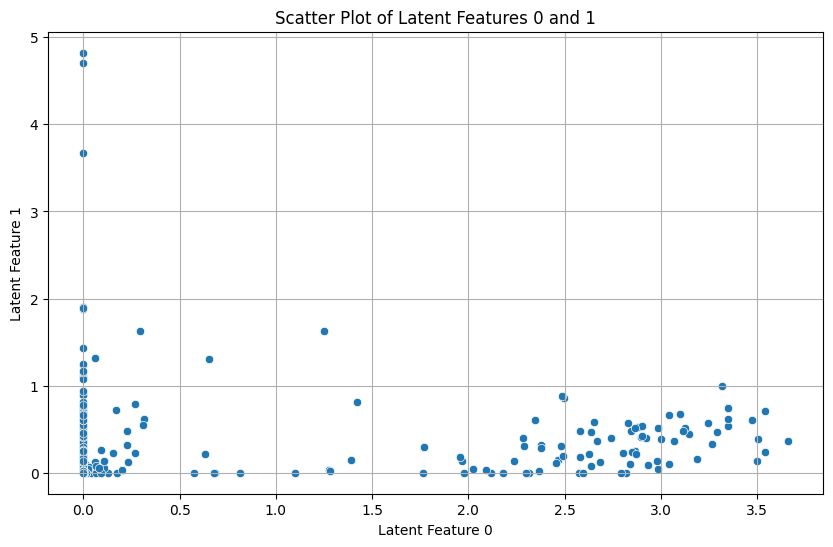

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame if not already done
rna_latent_df = pd.DataFrame(rna_latent_features)

# Visualize the first two latent features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rna_latent_df, x=0, y=1)
plt.title('Scatter Plot of Latent Features 0 and 1')
plt.xlabel('Latent Feature 0')
plt.ylabel('Latent Feature 1')
plt.grid()
plt.show()

Exploratory Data Analysis (EDA)

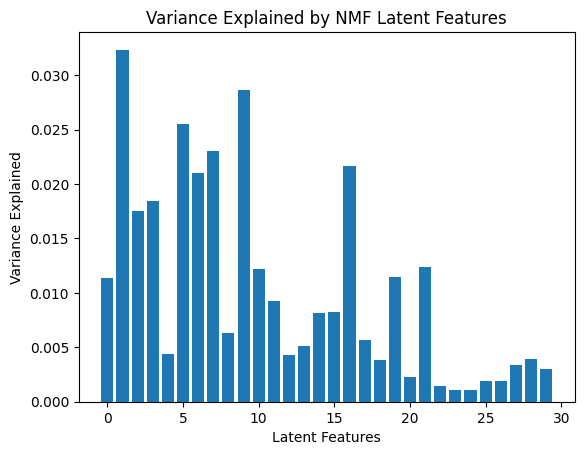

IndexError: Inconsistent shape between the condition and the input (got (4031, 1) and (4031,))

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load ADT data
adt_data = pd.read_csv('https://raw.githubusercontent.com/odhiambk/CIS-678-Machine-Learning/main/training_set_rna.csv')

# Variance Analysis: Plot the sum of squared components for each latent feature
variance_explained = nmf.components_.var(axis=1)
plt.bar(range(n_components), variance_explained)
plt.xlabel('Latent Features')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by NMF Latent Features')
plt.show()

# Correlation Analysis: Compute correlation between RNA latent features and ADT features
correlation_matrix = rna_latent_df.corrwith(adt_data, axis=0)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between RNA Latent Features and ADT Features')
plt.show()

In [13]:
print("Shape of RNA latent features:", rna_latent_df.shape)
print("Shape of ADT data:", adt_data.shape)

Shape of RNA latent features: (639, 30)
Shape of ADT data: (639, 4001)


In [15]:
# Step 1: Check for non-numeric values in ADT data
non_numeric_cols = adt_data.select_dtypes(include=['object']).columns
print("Non-numeric columns in ADT data:", non_numeric_cols)

# Check specific non-numeric values in each column
for col in non_numeric_cols:
    print(f"Unique values in column '{col}':", adt_data[col].unique())

# Step 2: If you want to drop non-numeric columns
adt_data_numeric = adt_data.drop(columns=non_numeric_cols)

# Alternatively, if you want to convert to numeric (coerce errors)
adt_data_numeric = adt_data.apply(pd.to_numeric, errors='coerce')

# Step 3: Verify shape after handling non-numeric values
print("Shape of numeric ADT data:", adt_data_numeric.shape)

# Now you can compute the correlations
correlations = pd.DataFrame(index=rna_latent_df.columns, columns=adt_data_numeric.columns)

# Compute correlations
for adt_feature in adt_data_numeric.columns:
    correlations[adt_feature] = rna_latent_df.corrwith(adt_data_numeric[adt_feature])

# Step 4: (Continue with plotting as previously described)

Non-numeric columns in ADT data: Index(['Unnamed: 0'], dtype='object')
Unique values in column 'Unnamed: 0': ['RPL22' 'PARK7' 'ENO1' 'RBP7' 'AGTRAP' 'EFHD2' 'CAPZB' 'MINOS1' 'CDC42'
 'RPL11' 'SRRM1' 'SYF2' 'SH3BGRL3' 'CD52' 'HMGN2' 'FGR' 'ATPIF1' 'LAPTM5'
 'PTP4A2' 'LCK' 'CSF3R' 'NDUFS5' 'CAP1' 'YBX1' 'ATP6V0B' 'RPS8' 'UQCRH'
 'CMPK1' 'TMEM59' 'SERBP1' 'GNG5' 'RPL5' 'CD53' 'C1orf162' 'CAPZA1'
 'CSDE1' 'CD2' 'TXNIP' 'MCL1' 'CTSS' 'S100A10' 'S100A11' 'S100A9'
 'S100A12' 'S100A8' 'S100A6' 'S100A4' 'JTB' 'RPS27' 'TPM3' 'SSR2' 'MNDA'
 'TAGLN2' 'CD48' 'TSTD1' 'FCER1G' 'FCGR3A' 'SELL' 'NCF2' 'ARPC5' 'RGS2'
 'PTPRC' 'SNRPE' 'TRAF3IP3' 'SRP9' 'H3F3A' 'GUK1' 'HNRNPU' 'RPS7' 'ID2'
 'OST4' 'COX7A2L' 'ZFP36L2' 'CALM2' 'RTN4' 'RPS27A' 'ACTR2' 'AAK1' 'PCBP1'
 'TMSB10' 'VAMP8' 'GNLY' 'CD8A' 'CD8B' 'IGKC' 'COX5B' 'RPL31' 'DBI' 'GYPC'
 'MZT2B' 'CXCR4' 'ZEB2' 'GCA' 'ATP5G3' 'HNRNPA3' 'STK17B' 'SUMO1' 'EEF1B2'
 'RPL37A' 'ARPC2' 'NCL' 'PTMA' 'LRRFIP1' 'MYEOV2' 'ARPC4' 'BRK1' 'RPL32'
 'RPL15' 'CMTM6' 'RPSA'

In [16]:
import pandas as pd

# Assuming adt_data is your DataFrame with ADT data
# Drop non-numeric columns
adt_data_numeric = adt_data.drop(columns=['Unnamed: 0'])

# Ensure no NaN values (optional, depending on your needs)
adt_data_numeric = adt_data_numeric.fillna(0)  # or use another method to handle NaN

# Initialize an empty dictionary to store correlations
correlations = {}

# Compute correlations
for adt_feature in adt_data_numeric.columns:
    correlations[adt_feature] = rna_latent_df.corrwith(adt_data_numeric[adt_feature])

# Convert correlations to a DataFrame for better visualization if needed
correlation_df = pd.DataFrame(correlations)

Columns in RNA data: Index(['Unnamed: 0', 'training_sample_1', 'training_sample_2',
       'training_sample_3', 'training_sample_4', 'training_sample_5',
       'training_sample_6', 'training_sample_7', 'training_sample_8',
       'training_sample_9',
       ...
       'training_sample_3991', 'training_sample_3992', 'training_sample_3993',
       'training_sample_3994', 'training_sample_3995', 'training_sample_3996',
       'training_sample_3997', 'training_sample_3998', 'training_sample_3999',
       'training_sample_4000'],
      dtype='object', length=4001)
Data types in RNA data: Unnamed: 0               object
training_sample_1       float64
training_sample_2       float64
training_sample_3       float64
training_sample_4       float64
                         ...   
training_sample_3996    float64
training_sample_3997    float64
training_sample_3998    float64
training_sample_3999    float64
training_sample_4000    float64
Length: 4001, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


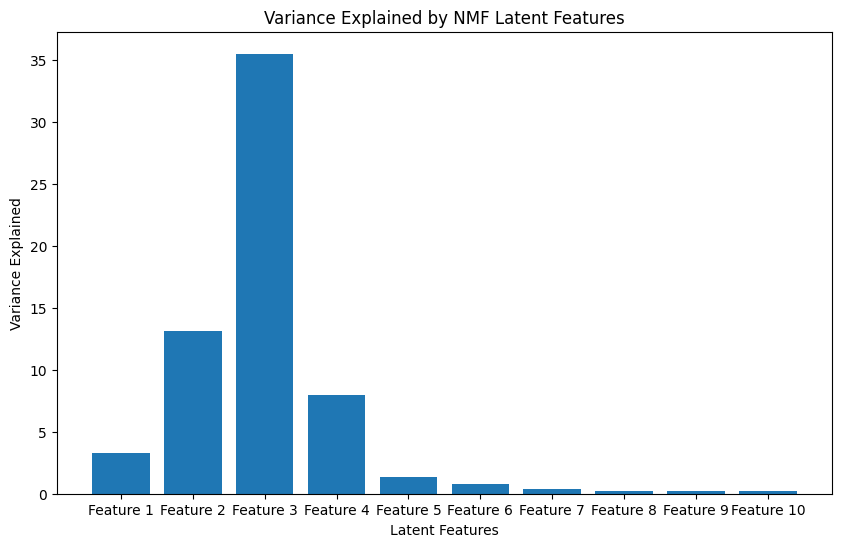

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


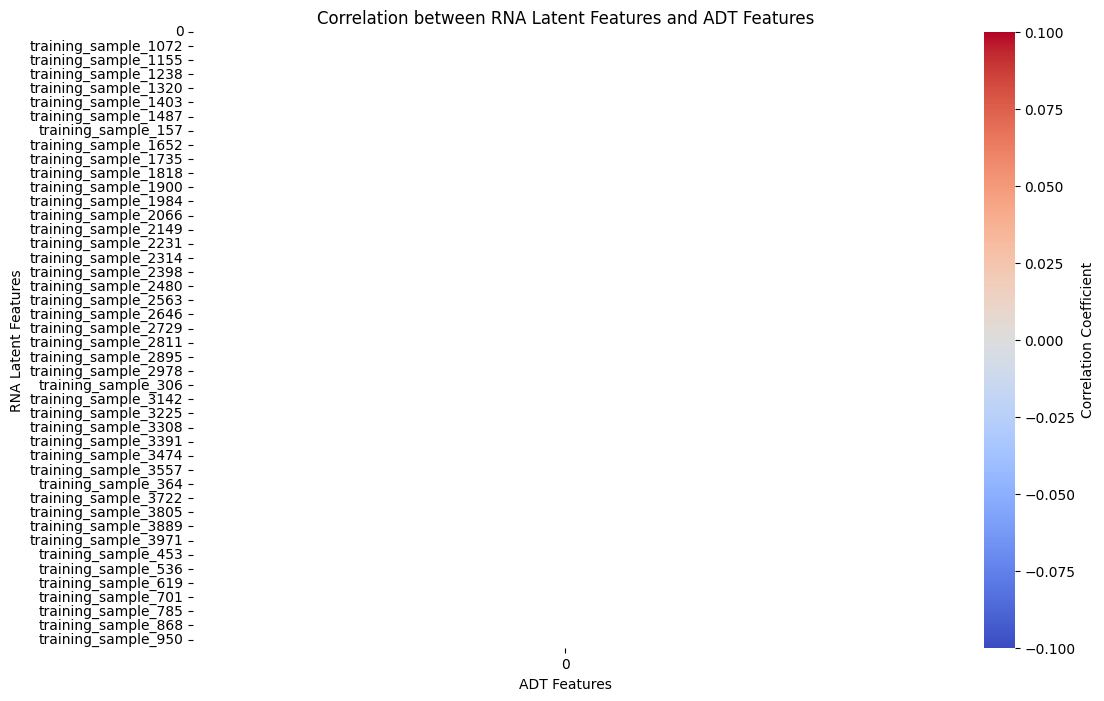

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF

# Load ADT data
adt_data = pd.read_csv('https://raw.githubusercontent.com/odhiambk/CIS-678-Machine-Learning/main/training_set_adt.csv')

# Load RNA data (Make sure to define your RNA data source correctly)
rna_data = pd.read_csv('https://raw.githubusercontent.com/odhiambk/CIS-678-Machine-Learning/main/training_set_rna.csv')  # Update with your actual RNA data path

# Check for non-numeric columns in rna_data
print("Columns in RNA data:", rna_data.columns)
print("Data types in RNA data:", rna_data.dtypes)

# Drop non-numeric columns or convert them
rna_data_numeric = rna_data.select_dtypes(include=[np.number])  # Keep only numeric columns

# Alternatively, convert non-numeric columns to numeric and coerce errors
# rna_data_numeric = rna_data.apply(pd.to_numeric, errors='coerce)

# Initialize NMF model and fit to your numeric RNA data
n_components = 10  # Specify the number of components you want
nmf = NMF(n_components=n_components)
rna_latent_features = nmf.fit_transform(rna_data_numeric)  # Use the numeric data

# Variance Analysis: Plot the variance explained by each latent feature
variance_explained = nmf.components_.var(axis=1)
plt.figure(figsize=(10, 6))
plt.bar(range(n_components), variance_explained)
plt.xlabel('Latent Features')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by NMF Latent Features')
plt.xticks(range(n_components), [f'Feature {i+1}' for i in range(n_components)])  # Labeling x-axis
plt.show()

# Correlation Analysis: Compute correlation between RNA latent features and ADT features
# Ensure that both DataFrames are numeric and of the same shape
adt_data_numeric = adt_data.select_dtypes(include=[np.number])  # Keep only numeric columns
correlation_matrix = pd.DataFrame(rna_latent_features).corrwith(adt_data_numeric, axis=0)

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation between RNA Latent Features and ADT Features')
plt.xlabel('ADT Features')
plt.ylabel('RNA Latent Features')
plt.show()

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load ADT data
adt_data = pd.read_csv('https://raw.githubusercontent.com/odhiambk/CIS-678-Machine-Learning/main/training_set_adt.csv')

# Rename the first column for clarity
adt_data.rename(columns={'Unnamed: 0': 'feature_name'}, inplace=True)

# Load RNA data (ensure it's loaded correctly)
rna_data = pd.read_csv('https://raw.githubusercontent.com/odhiambk/CIS-678-Machine-Learning/main/training_set_rna.csv')  # Update with your actual RNA data path

# Transpose ADT data to have samples as rows if necessary
adt_data_transposed = adt_data.iloc[:, 1:].T  # Drop the first column and transpose
adt_data_transposed.columns = adt_data['feature_name']  # Set the feature names as columns

# Check shapes
print(f"Transposed ADT Data Shape: {adt_data_transposed.shape}")  # Should be (4001, 25)

# Make sure to filter the RNA data to match the same samples as in the transposed ADT data
# For this, you need to know the sample identifiers or indices; here's a general approach
common_samples = rna_data.columns[1:]  # Assuming first column is not samples
# Match the common samples in the ADT dataset (assuming the same identifiers are used)
rna_filtered = rna_data[common_samples.intersection(adt_data_transposed.index)]

# Check the shapes after filtering
print(f"Filtered RNA Data Shape: {rna_filtered.shape}")
print(f"Filtered ADT Data Shape: {adt_data_transposed.shape}")

# Ensure the lengths match for regression
if rna_filtered.shape[0] == adt_data_transposed.shape[0]:
    for adt_feature in adt_data_transposed.columns:
        # Prepare data for regression
        X = rna_filtered  # RNA features
        y = adt_data_transposed[adt_feature]  # Single ADT feature

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate model
        mse = mean_squared_error(y_test, y_pred)
        print(f'Mean Squared Error for {adt_feature}: {mse:.4f}')

        # Optional: Ridge Regression
        from sklearn.linear_model import Ridge

        ridge_model = Ridge(alpha=1.0)  # Adjust alpha for regularization
        ridge_model.fit(X_train, y_train)
        y_pred_ridge = ridge_model.predict(X_test)

        # Evaluate Ridge model
        mse_ridge = mean_squared_error(y_test, y_pred_ridge)
        print(f'Mean Squared Error for {adt_feature} with Ridge Regression: {mse_ridge:.4f}')
else:
    print("Mismatch in the number of samples between RNA and ADT data.")

Transposed ADT Data Shape: (4000, 25)
Filtered RNA Data Shape: (639, 4000)
Filtered ADT Data Shape: (4000, 25)
Mismatch in the number of samples between RNA and ADT data.


In [24]:
print(f"RNA Data Shape: {rna_data_numeric.shape}")
print(f"ADT Data Shape: {adt_data.shape}")

RNA Data Shape: (639, 4000)
ADT Data Shape: (25, 4001)


In [25]:
adt_data.head()

,Unnamed: 0,training_sample_1,training_sample_2,training_sample_3,training_sample_4,training_sample_5,training_sample_6,training_sample_7,training_sample_8,training_sample_9,...,training_sample_3991,training_sample_3992,training_sample_3993,training_sample_3994,training_sample_3995,training_sample_3996,training_sample_3997,training_sample_3998,training_sample_3999,training_sample_4000
0,CD11a,0.413866,0.294449,0.531469,0.263649,0.438042,0.686346,0.730096,0.299949,1.111089,...,0.526016,1.348110,0.512804,0.408960,1.166204,0.713007,0.368821,1.064956,1.060479,0.808950
1,CD11c,1.299088,0.136347,1.043159,0.246849,0.284185,0.404868,0.603104,0.354919,0.482943,...,0.512543,0.490426,0.371848,0.320178,2.240665,0.609743,0.217903,0.880499,0.475405,0.371848
2,CD123,0.474643,0.205216,0.520798,0.073185,0.265222,0.564916,0.426254,0.426254,0.321830,...,0.607170,0.426254,0.375404,0.724171,1.967158,0.426254,0.073185,1.714842,0.686671,0.265222
3,CD127-IL7Ra,0.402731,0.757762,0.354215,0.872654,1.337662,1.864847,0.615251,0.984558,0.303224,...,1.124305,0.320511,1.764897,0.303224,0.386819,1.796728,1.191072,0.249493,2.544464,1.850105
4,CD14,0.527878,0.160274,0.298374,0.189462,0.272238,0.419696,0.587582,0.323845,0.272238,...,0.396581,0.396581,0.527878,0.323845,2.448333,0.606716,0.160274,1.459272,0.625492,0.507158


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load ADT data
adt_data = pd.read_csv('https://raw.githubusercontent.com/odhiambk/CIS-678-Machine-Learning/main/training_set_adt.csv')

# Rename the first column for clarity
adt_data.rename(columns={'Unnamed: 0': 'feature_name'}, inplace=True)

# Load RNA data (ensure it's loaded correctly)
rna_data = pd.read_csv('https://raw.githubusercontent.com/odhiambk/CIS-678-Machine-Learning/main/training_set_rna.csv')  # Update with your actual RNA data path

# Transpose ADT data to have samples as rows if necessary
adt_data_transposed = adt_data.iloc[:, 1:].T  # Drop the first column and transpose
adt_data_transposed.columns = adt_data['feature_name']  # Set the feature names as columns

# Check shapes
print(f"Transposed ADT Data Shape: {adt_data_transposed.shape}")  # Should be (4000, 25)

# Transpose RNA data if necessary
if rna_data.shape[0] != 4000:  # Assuming 4000 samples are expected
    rna_data_transposed = rna_data.T  # Transpose RNA data if needed
    print(f"Transposed RNA Data Shape: {rna_data_transposed.shape}")

# Now check the shapes again
print(f"RNA Data Shape: {rna_data_transposed.shape}")
print(f"ADT Data Shape: {adt_data_transposed.shape}")

# Make sure to filter the RNA data to match the same samples as in the transposed ADT data
# For this, you need to know the sample identifiers or indices; here's a general approach
common_samples = rna_data_transposed.index.intersection(adt_data_transposed.index)  # Get common sample indices

# Filter RNA data based on common samples
rna_filtered = rna_data_transposed.loc[common_samples]

# Check the shapes after filtering
print(f"Filtered RNA Data Shape: {rna_filtered.shape}")
print(f"Filtered ADT Data Shape: {adt_data_transposed.shape}")

# Ensure the lengths match for regression
if rna_filtered.shape[0] == adt_data_transposed.shape[0]:
    for adt_feature in adt_data_transposed.columns:
        # Prepare data for regression
        X = rna_filtered  # RNA features
        y = adt_data_transposed[adt_feature]  # Single ADT feature

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate model
        mse = mean_squared_error(y_test, y_pred)
        print(f'Mean Squared Error for {adt_feature}: {mse:.4f}')

        # Optional: Ridge Regression
        from sklearn.linear_model import Ridge

        ridge_model = Ridge(alpha=1.0)  # Adjust alpha for regularization
        ridge_model.fit(X_train, y_train)
        y_pred_ridge = ridge_model.predict(X_test)

        # Evaluate Ridge model
        mse_ridge = mean_squared_error(y_test, y_pred_ridge)
        print(f'Mean Squared Error for {adt_feature} with Ridge Regression: {mse_ridge:.4f}')
else:
    print("Mismatch in the number of samples between RNA and ADT data.")

Transposed ADT Data Shape: (4000, 25)
Transposed RNA Data Shape: (4001, 639)
RNA Data Shape: (4001, 639)
ADT Data Shape: (4000, 25)
Filtered RNA Data Shape: (4000, 639)
Filtered ADT Data Shape: (4000, 25)
Mean Squared Error for CD11a: 0.0461
Mean Squared Error for CD11a with Ridge Regression: 0.0461
Mean Squared Error for CD11c: 0.1076
Mean Squared Error for CD11c with Ridge Regression: 0.1076
Mean Squared Error for CD123: 0.2299
Mean Squared Error for CD123 with Ridge Regression: 0.2298
Mean Squared Error for CD127-IL7Ra: 0.1412
Mean Squared Error for CD127-IL7Ra with Ridge Regression: 0.1411
Mean Squared Error for CD14: 0.1121
Mean Squared Error for CD14 with Ridge Regression: 0.1121
Mean Squared Error for CD16: 0.1621
Mean Squared Error for CD16 with Ridge Regression: 0.1620
Mean Squared Error for CD161: 0.1233
Mean Squared Error for CD161 with Ridge Regression: 0.1232
Mean Squared Error for CD19: 0.1683
Mean Squared Error for CD19 with Ridge Regression: 0.1682
Mean Squared Error fo